In [600]:
import pandas as pd
import numpy as np
# data.csv 불러오기
df = pd.read_csv('data3.csv')

df.head()

,Year,Regn,Aslt,Fraud,Drug,Thief,Popln,Incme,StnNo,Police,...,CPI,Aging,Dens,Estab,Multi,Crime_Aslt,Crime_Fraud,Crime_Drug,Crime_Thief,Crime
0,2023,경기고양,2178,5695,223,2786,1087607,2530948,18,590.0,...,129.2,147.1,4055.964945,76.0,6717.0,200.256159,523.626641,20.503730,256.158704,1000.545234
1,2023,경기과천,90,259,11,271,81219,3140116,2,179.0,...,129.2,96.6,2264.259827,0.0,258.0,110.811510,318.890900,13.543629,333.665768,776.911806
2,2023,경기광명,674,1679,42,968,283124,2765984,6,497.0,...,129.2,144.4,7350.051921,145.0,1885.0,238.058236,593.026377,14.834489,341.899662,1187.818765
3,2023,경기광주,1071,1988,53,1012,404270,2754320,9,475.0,...,129.2,132.7,938.003202,35.0,3736.0,264.921958,491.750563,13.110050,250.327751,1020.110322
4,2023,경기구리,400,886,35,538,188634,2379973,5,376.0,...,129.2,154.1,5657.888422,184.0,1013.0,212.050850,469.692632,18.554449,285.208393,985.506324


In [601]:
# 지역(Regn)을 기준으로 정렬
df = df.sort_values(by=['Regn'])

In [602]:
# 전처리
# 인구수와 범죄횟수, 지역명, 날짜 칼럼 삭제
df = df.drop(columns=['Popln', 'Aslt', 'Fraud', 'Drug', 'Thief', 'Regn', 'Year', 'Crime_Aslt', 'Crime_Fraud', 'Crime_Drug', 'Crime_Thief'])
df.head()

# 최종칼럼:
# Incme	    StnNo	     Police	   Float	  Unemp	  CPI	         Aging	    Dens	  Estab	        Multi	        Crime
# 평균소득   지역내파출소  경찰관수   유동인구   실업율   소비자물가지수  노령화인구  인구밀도   유흥주점수     다문화가구수     범죄율

,Incme,StnNo,Police,Float,Unemp,CPI,Aging,Dens,Estab,Multi,Crime
386,2124210,7,412.0,231.0,1.9,118.7,216.3,204.610743,216.0,1086.0,964.008170
338,2268741,7,414.0,233.0,2.0,124.7,236.7,203.088881,214.0,1100.0,1030.366968
216,2350665,7,418.0,235.0,1.6,129.2,258.8,201.223062,213.0,1187.0,1302.049762
433,2018895,7,412.0,222.0,3.3,115.8,200.5,204.952778,216.0,1017.0,1122.252380
481,1957219,7,411.0,227.0,2.4,115.2,186.5,205.069031,221.0,914.0,1151.132392


In [603]:
# 결측치 확인
print(df.isnull().sum())

# 결측치를 근처 값으로 대체
df = df.fillna(method='ffill')

# print
df.head()

Incme     0
StnNo     0
Police    7
Float     6
Unemp     7
CPI       0
Aging     1
Dens      0
Estab     7
Multi     1
Crime     0
dtype: int64


C:\Users\qkrwn\AppData\Local\Temp\ipykernel_10972\1223705685.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,Incme,StnNo,Police,Float,Unemp,CPI,Aging,Dens,Estab,Multi,Crime
386,2124210,7,412.0,231.0,1.9,118.7,216.3,204.610743,216.0,1086.0,964.008170
338,2268741,7,414.0,233.0,2.0,124.7,236.7,203.088881,214.0,1100.0,1030.366968
216,2350665,7,418.0,235.0,1.6,129.2,258.8,201.223062,213.0,1187.0,1302.049762
433,2018895,7,412.0,222.0,3.3,115.8,200.5,204.952778,216.0,1017.0,1122.252380
481,1957219,7,411.0,227.0,2.4,115.2,186.5,205.069031,221.0,914.0,1151.132392


In [604]:
# 랜덤 시드 고정
np.random.seed(13)  # 원하는 정수 값으로 변경 가능

# 데이터 증강
def bootstrap_resample(df, n_samples):
    indices = np.random.choice(df.index, size=n_samples, replace=True)
    resampled_df = df.loc[indices]
    return resampled_df

# 증강할 데이터 수 설정
n_augmented_samples = 600

# 부트스트랩 적용
augmented_df = bootstrap_resample(df, n_augmented_samples)

# 원본 데이터와 증강된 데이터 결합
df = pd.concat([df, augmented_df])

# 결과 확인
print(df.shape)

(1204, 11)


In [605]:
# crime과과 다른 칼럼간의 상관계수 확인
print(df.corr()['Crime'].sort_values(ascending=False))

Crime     1.000000
Dens      0.334265
Police    0.312731
Incme     0.274220
Unemp     0.264496
Estab     0.257814
Multi     0.197110
Float     0.155094
StnNo     0.147743
CPI       0.134265
Aging    -0.144096
Name: Crime, dtype: float64


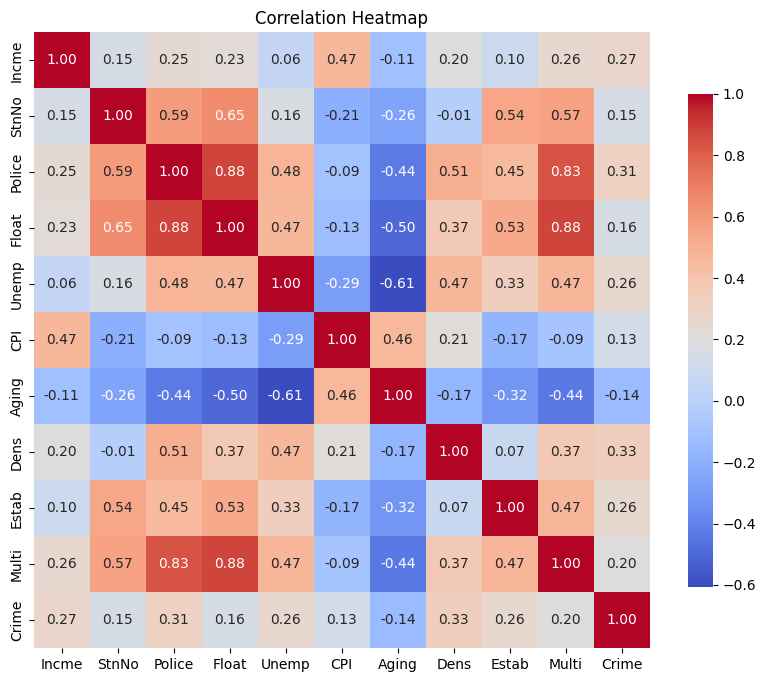

In [606]:
# crime과 다른 칼럼간의 상관계수 히트맵
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [595]:
# crime와 상관계수가 절대값으로 높은 칼럼들 7개만 선택
cols = df.corr()['Crime'].abs().sort_values(ascending=False).index[:7]
df = df[cols]

df.head()

,Crime,Dens,Police,Incme,Unemp,Estab,Multi
386,964.008170,204.610743,412.0,2124210,1.9,216.0,1086.0
338,1030.366968,203.088881,414.0,2268741,2.0,214.0,1100.0
216,1302.049762,201.223062,418.0,2350665,1.6,213.0,1187.0
433,1122.252380,204.952778,412.0,2018895,3.3,216.0,1017.0
481,1151.132392,205.069031,411.0,1957219,2.4,221.0,914.0


In [596]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 범죄율을 키값으로 학습 데이터 생성
X = df.drop(columns=['Crime'])
y = df['Crime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=700,
    learning_rate=0.01,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=5,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=None, num_parallel_tree=None, ...)

In [597]:
from sklearn.metrics import mean_squared_error, r2_score

# XGB 테스트 데이터 성능 평가
y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("XGB Test MSE:", mse_test)
print("XGB Test R2:", r2_test)

XGB Test MSE: 25712.946621551408
XGB Test R2: 0.8057334355461441


In [598]:
# XGB 훈련 데이터 성능 평가
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("XGB Train MSE:", mse_train)
print("XGB Train R2:", r2_train)

XGB Train MSE: 24233.32485945793
XGB Train R2: 0.8104257776178817


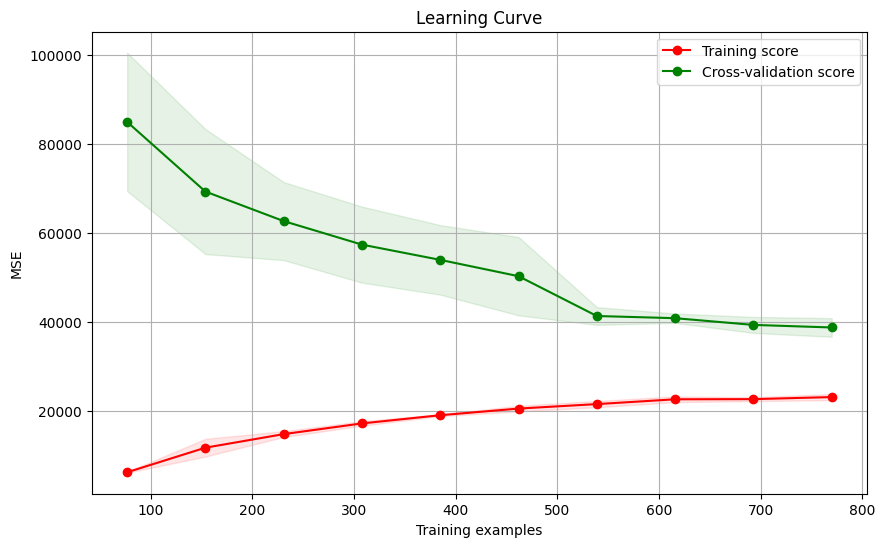

In [599]:
# XGB 러닝커브 그리기
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# 러닝커브 그리기
train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train,
    y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()